# PYTHON - TFIDF

#### Ing.Luis Felipe Narvaez Gomez. E-mail: luis.narvaez@usantoto.edu.co. Cod:2312660.  Facultad de Ingenieria de Sistemas

### TF_IDF_SK-Learn

El documento se Dibide en dos parte, Analisis de comportamiento de los algoritmos con tres idiomas y cambios aplicados en un nuevo tema en un unico idioma

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### El Canto de la Farsalea (Lucano)

In [260]:
corpus = ['Las espadas han sido concedidas para que ninguno sea esclavo',
          'The swords have been granted so that no one is a slave',
          'Die Schwerter wurden gewährt damit niemand ein Sklave ist' ]

In [261]:
print(corpus)

['Las espadas han sido concedidas para que ninguno sea esclavo', 'The swords have been granted so that no one is a slave', 'Die Schwerter wurden gewährt damit niemand ein Sklave ist']


**A continuación, crearemos un conjunto de palabras para el corpus:**

In [262]:
words_set = set()

for doc in corpus:
    words = doc.split(' ')
    words_set = words_set.union(set(words))

In [263]:
print('Numero de palabras en el parrafo:',len(words_set))

Numero de palabras en el parrafo: 31


In [264]:
print('Palabras en el parrafo: \n\n\n', words_set)

Palabras en el parrafo: 


 {'que', 'slave', 'han', 'ninguno', 'granted', 'espadas', 'Las', 'Sklave', 'wurden', 'a', 'one', 'so', 'is', 'ist', 'been', 'niemand', 'sido', 'The', 'swords', 'Die', 'concedidas', 'para', 'gewährt', 'esclavo', 'that', 'have', 'sea', 'ein', 'damit', 'Schwerter', 'no'}


**Cómputo de la frecuencia del término**
Ahora podemos crear un marco de datos por la cantidad de documentos en el corpus y el conjunto de palabras, y usar esa información para calcular la frecuencia del término (TF):

In [265]:
#CREAR AL DATAFRAME

#Numero de documentos en el parrafo
n_docs = len(corpus)
#Numero de palabras unicas en el parrafo (que no se repiten alv) 
n_words_set = len(words_set) 

df_tf = pd.DataFrame(np.zeros((n_docs, n_words_set)), columns=words_set)

# Compute Term Frequency (TF)
for i in range(n_docs):
    words = corpus[i].split(' ') # Words in the document
    for w in words:
        df_tf[w][i] = df_tf[w][i] + (1 / len(words))

In [266]:
df_tf.head()

,que,slave,han,ninguno,granted,espadas,Las,Sklave,wurden,a,...,para,gewährt,esclavo,that,have,sea,ein,damit,Schwerter,no
0,0.1,0.000000,0.1,0.1,0.000000,0.1,0.1,0.000000,0.000000,0.000000,...,0.1,0.000000,0.1,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.000000
1,0.0,0.083333,0.0,0.0,0.083333,0.0,0.0,0.000000,0.000000,0.083333,...,0.0,0.000000,0.0,0.083333,0.083333,0.0,0.000000,0.000000,0.000000,0.083333
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.111111,0.111111,0.000000,...,0.0,0.111111,0.0,0.000000,0.000000,0.0,0.111111,0.111111,0.111111,0.000000


In [267]:
x_label = df_tf.iloc[0,0:14] # trae todas las columnas, solo primera fila
y_label = list(df_tf.columns.values) # trae las etiquetas de las columnas

array([<AxesSubplot:title={'center':'que'}>,
       <AxesSubplot:title={'center':'slave'}>,
       <AxesSubplot:title={'center':'han'}>,
       <AxesSubplot:title={'center':'ninguno'}>,
       <AxesSubplot:title={'center':'granted'}>,
       <AxesSubplot:title={'center':'espadas'}>,
       <AxesSubplot:title={'center':'Las'}>,
       <AxesSubplot:title={'center':'Sklave'}>,
       <AxesSubplot:title={'center':'wurden'}>,
       <AxesSubplot:title={'center':'a'}>,
       <AxesSubplot:title={'center':'one'}>,
       <AxesSubplot:title={'center':'so'}>,
       <AxesSubplot:title={'center':'is'}>,
       <AxesSubplot:title={'center':'ist'}>,
       <AxesSubplot:title={'center':'been'}>,
       <AxesSubplot:title={'center':'niemand'}>,
       <AxesSubplot:title={'center':'sido'}>,
       <AxesSubplot:title={'center':'The'}>,
       <AxesSubplot:title={'center':'swords'}>,
       <AxesSubplot:title={'center':'Die'}>,
       <AxesSubplot:title={'center':'concedidas'}>,
       <AxesSubplot:tit

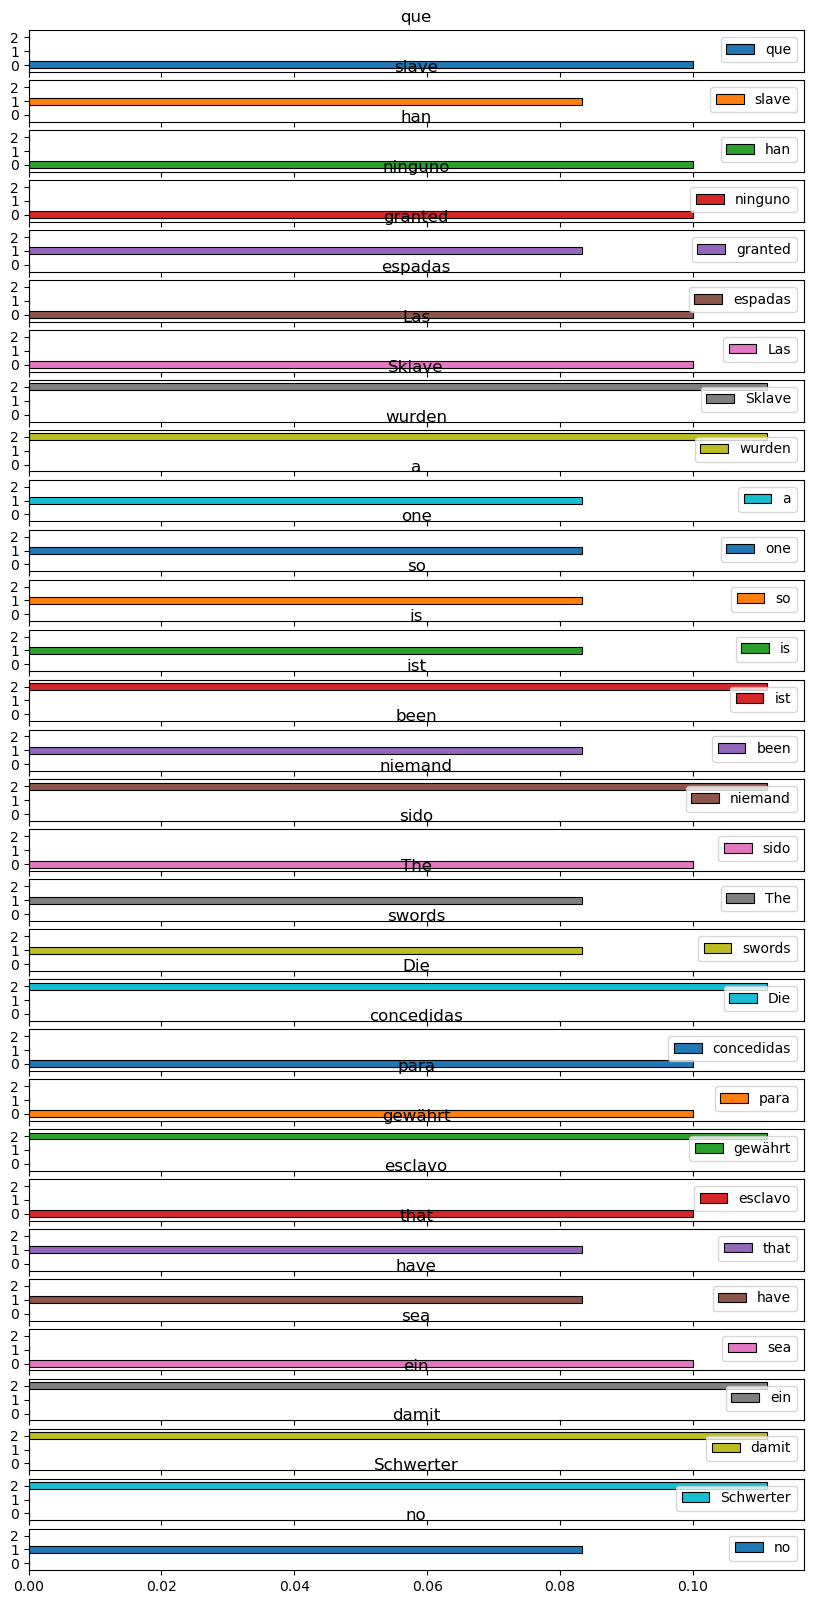

In [268]:
df_tf.plot(kind='barh', edgecolor="black", linewidth=0.8, subplots=True, figsize=(10,20))

El dataframe anterior muestra que tenemos una columna para cada palabra y una fila para cada documento. Esto muestra la frecuencia de cada palabra en cada documento.

**Ahora, calcularemos la frecuencia inversa del documento (IDF):**

In [269]:
print("IDF of: ")

idf = {}

for w in words_set:
    k = 0    # number of documents in the corpus that contain this word
    
    for i in range(n_docs):
        if w in corpus[i].split():
            k += 1
            
    idf[w] =  np.log10(n_docs / k)
    
    print(f'{w:>15}: {idf[w]:>10}' )

IDF of: 
            que: 0.47712125471966244
          slave: 0.47712125471966244
            han: 0.47712125471966244
        ninguno: 0.47712125471966244
        granted: 0.47712125471966244
        espadas: 0.47712125471966244
            Las: 0.47712125471966244
         Sklave: 0.47712125471966244
         wurden: 0.47712125471966244
              a: 0.47712125471966244
            one: 0.47712125471966244
             so: 0.47712125471966244
             is: 0.47712125471966244
            ist: 0.47712125471966244
           been: 0.47712125471966244
        niemand: 0.47712125471966244
           sido: 0.47712125471966244
            The: 0.47712125471966244
         swords: 0.47712125471966244
            Die: 0.47712125471966244
     concedidas: 0.47712125471966244
           para: 0.47712125471966244
        gewährt: 0.47712125471966244
        esclavo: 0.47712125471966244
           that: 0.47712125471966244
           have: 0.47712125471966244
            sea: 0.4771212547

# **Juntando todo:  TF-IDF**
Como ahora tenemos TF e IDF, podemos calcular TF-IDF:

In [270]:
df_tf_idf = df_tf.copy()

for w in words_set:
    for i in range(n_docs):
        df_tf_idf[w][i] = df_tf[w][i] * idf[w]

In [271]:
df_tf_idf.head()

,que,slave,han,ninguno,granted,espadas,Las,Sklave,wurden,a,...,para,gewährt,esclavo,that,have,sea,ein,damit,Schwerter,no
0,0.047712,0.00000,0.047712,0.047712,0.00000,0.047712,0.047712,0.000000,0.000000,0.00000,...,0.047712,0.000000,0.047712,0.00000,0.00000,0.047712,0.000000,0.000000,0.000000,0.00000
1,0.000000,0.03976,0.000000,0.000000,0.03976,0.000000,0.000000,0.000000,0.000000,0.03976,...,0.000000,0.000000,0.000000,0.03976,0.03976,0.000000,0.000000,0.000000,0.000000,0.03976
2,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.053013,0.053013,0.00000,...,0.000000,0.053013,0.000000,0.00000,0.00000,0.000000,0.053013,0.053013,0.053013,0.00000


Tenga en cuenta que "datos" tiene un IDF de 0 porque aparece en todos los documentos. Como resultado, no se considera un término importante en este corpus. Esto cambiará ligeramente en la siguiente implementación de sklearn, donde los "datos" no serán cero.

# TF-IDF Using scikit-learn

In [272]:
from sklearn.feature_extraction.text import TfidfVectorizer

Primero necesitamos instanciar la clase, luego podemos llamar al método **fit_transform** en nuestro corpus de prueba. Esto realizará todos los cálculos que realizamos anteriormente.

In [273]:
tr_idf_model  = TfidfVectorizer()
tf_idf_vector = tr_idf_model.fit_transform(corpus)

Después de vectorizar el corpus por la función, se obtiene una matriz dispersa.

Aquí está la forma actual de la matriz:

In [274]:
print(type(tf_idf_vector), tf_idf_vector.shape)

<class 'scipy.sparse.csr.csr_matrix'> (3, 30)


Y podemos convertir a una matriz regular para tener una mejor idea de los valores:

In [275]:
tf_idf_array = tf_idf_vector.toarray()

print(tf_idf_array)

[[0.         0.31622777 0.         0.         0.         0.31622777
  0.31622777 0.         0.         0.31622777 0.         0.
  0.         0.31622777 0.         0.31622777 0.         0.
  0.31622777 0.31622777 0.         0.31622777 0.31622777 0.
  0.         0.         0.         0.         0.         0.        ]
 [0.30151134 0.         0.         0.         0.         0.
  0.         0.         0.30151134 0.         0.30151134 0.30151134
  0.         0.         0.         0.         0.30151134 0.30151134
  0.         0.         0.         0.         0.         0.
  0.30151134 0.30151134 0.30151134 0.30151134 0.30151134 0.        ]
 [0.         0.         0.33333333 0.33333333 0.33333333 0.
  0.         0.33333333 0.         0.         0.         0.
  0.33333333 0.         0.33333333 0.         0.         0.
  0.         0.         0.33333333 0.         0.         0.33333333
  0.         0.         0.         0.         0.         0.33333333]]


Ahora es muy sencillo obtener los términos originales en el corpus usando **get_feature_names**:

In [276]:
words_set = tr_idf_model.get_feature_names()

print(words_set)

['been', 'concedidas', 'damit', 'die', 'ein', 'esclavo', 'espadas', 'gewährt', 'granted', 'han', 'have', 'is', 'ist', 'las', 'niemand', 'ninguno', 'no', 'one', 'para', 'que', 'schwerter', 'sea', 'sido', 'sklave', 'slave', 'so', 'swords', 'that', 'the', 'wurden']


D:\SOFTWARE\Anaconda 3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Finalmente, crearemos un marco de datos para mostrar mejor los puntajes TF-IDF de cada documento:

In [277]:
df_tf_idf = pd.DataFrame(tf_idf_array, columns = words_set)

df_tf_idf

,been,concedidas,damit,die,ein,esclavo,espadas,gewährt,granted,han,...,schwerter,sea,sido,sklave,slave,so,swords,that,the,wurden
0,0.000000,0.316228,0.000000,0.000000,0.000000,0.316228,0.316228,0.000000,0.000000,0.316228,...,0.000000,0.316228,0.316228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.301511,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.301511,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.301511,0.301511,0.301511,0.301511,0.301511,0.000000
2,0.000000,0.000000,0.333333,0.333333,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,...,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333


Como puede ver en el resultado anterior, los puntajes de TF-IDF son diferentes a los puntajes obtenidos por el proceso manual que usamos anteriormente. Esta diferencia se debe a la implementación de TF-IDF de Sklearn, que utiliza una fórmula ligeramente diferente.

array([<AxesSubplot:title={'center':'been'}>,
       <AxesSubplot:title={'center':'concedidas'}>,
       <AxesSubplot:title={'center':'damit'}>,
       <AxesSubplot:title={'center':'die'}>,
       <AxesSubplot:title={'center':'ein'}>,
       <AxesSubplot:title={'center':'esclavo'}>,
       <AxesSubplot:title={'center':'espadas'}>,
       <AxesSubplot:title={'center':'gewährt'}>,
       <AxesSubplot:title={'center':'granted'}>,
       <AxesSubplot:title={'center':'han'}>,
       <AxesSubplot:title={'center':'have'}>,
       <AxesSubplot:title={'center':'is'}>,
       <AxesSubplot:title={'center':'ist'}>,
       <AxesSubplot:title={'center':'las'}>,
       <AxesSubplot:title={'center':'niemand'}>,
       <AxesSubplot:title={'center':'ninguno'}>,
       <AxesSubplot:title={'center':'no'}>,
       <AxesSubplot:title={'center':'one'}>,
       <AxesSubplot:title={'center':'para'}>,
       <AxesSubplot:title={'center':'que'}>,
       <AxesSubplot:title={'center':'schwerter'}>,
       <AxesSub

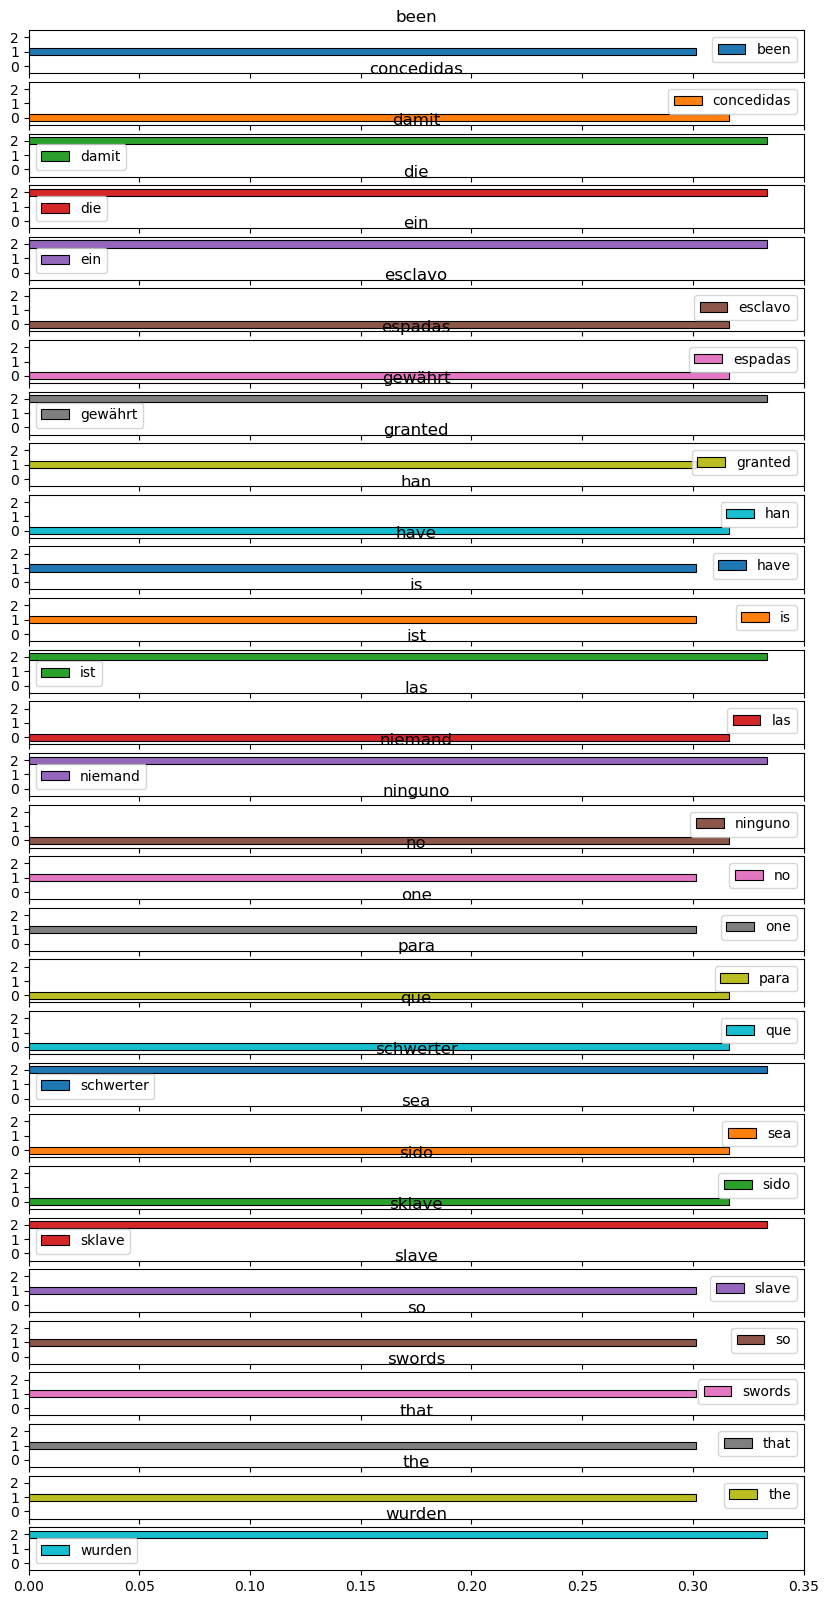

In [278]:
df_tf_idf.plot(kind='barh', edgecolor="black", linewidth=0.8, subplots=True, figsize=(10,20))

# Cambiemos a otros temas

## Un solo Idioma

Veamos si puede extractar las palabras claves de este texto que permita clasificarlo o dar una idea de lo que trata.
El primer texto que vamos a utilizar es el siguiente:

### Noticia: Estas son algunas de las principales señales de alarma frente al suicidio
#### Enlace: https://www.eltiempo.com/salud/estas-son-algunas-de-las-principales-senales-de-alarma-frente-al-suicidio-701321

La Organización Mundial de la Salud, conmemora el Día Mundial de Prevención del Suicidio, con el ánimo de reducir la tasa de suicidios que se presenta en el mundo y despertar el interés y la preocupación en los profesionales en salud mental de ofrecer soluciones efectivas a la sociedad.
De acuerdo con el Informe más reciente de Salud Mental de la OMS publicado en junio de 2022 el suicidio representa más de uno de cada 100 fallecimientos en el mundo, es una de las principales causas de muerte entre los jóvenes.
En Colombia según el DANE, en un análisis de los efectos de la pandemia, en el 2021, se registraron 709 casos de suicidio, de los cuales 585 correspondieron a hombres y 124 a mujeres, mostrando un aumento con respecto al mismo periodo en el 2019.
Para Ángela Henao, directora de los Posgrados en Psicología Clínica de la Fundación Universitaria Konrad Lorenz, las cifras anteriores ponen de manifiesto la importancia de desarrollar acciones efectivas que prevengan esta situación, con el fin de disminuir los riesgos y fomentar entornos favorables para la salud mental.
“Debemos desarrollar acciones que promuevan conductas resilientes en la población, desarrollar intervenciones comunitarias que fomenten habilidades de resolución de problemas, habilidades sociales, habilidades de comunicación efectiva, promoción de ambientes de participación e interacción con otros, adecuado uso de tiempo libre y atención a los dolientes del suicida.
Para Yaneth Urrego, doctora en psicología y docente de la misma Institución existen algunos signos de alarma que pueden ayudar a la detección de la problemática, “el inicio de un sentimiento de vacío, la pérdida del sentido de la vida, el desinterés por actividades con las que antes se sentía placer, el aislamiento, la búsqueda frecuente de métodos efectivos de suicidio, la manifestación abierta de pensar en esta posibilidad y las conductas parasuicidas”.
Las señales
La experta en psicología también señala los principales factores de riesgo que hacen vulnerable a una persona para llegar a una conducta suicida son:
Vulnerabilidad Biológica. Las investigaciones han descubierto que cuando hay daño en los receptores del neurotransmisor de serotonina, aumenta la probabilidad de conductas de depresión lo cual hace más sensible a las personas ante situaciones que ven como difíciles de superar o como perdida.
Por otra parte, existe alteraciones en el neurotransmisor GABA, que aumenta la presencia de conductas impulsivas, siendo esta un factor que aumenta la desregulación emocional y la dificultad para retornar a un estado donde se encuentre tranquilidad que permita evaluar las situaciones de una forma positiva.
Conflictos Familiares. En los estudios que hemos realizado con niños y adolescentes, especialmente, algo que los afecta de manera importante son las discusiones constantes delante de ellos, dado que los motivos de conflicto se relacionan en temas que los involucran (su cuidado, custodia, acompañamiento y asistencia al colegio, cuotas alimenticias, recursos escolares, etc). De forma similar, pasa con los temas que involucran a los adultos mayores (acompañamiento, cuidado, recursos económicos) llevando a que en las diferentes edades surjan pensamientos de sí ellos no existieran aliviarían la carga de sus padres y/o familiares y el suicidarse sería una solución para los problemas de los demás.
Factores estresantes. En todos los contextos se presentan eventos donde no se cumplen las expectativas de lo que se esperaba. El acoso escolar y laboral, las pérdidas económicas, las perdidas afectivas son situaciones que se presentan de manera aguda o crónica, que al no ser resueltas de manera efectiva, llevan a considerar que no van a tener solución y se acompañan de gran sufrimiento. Siendo este último, lo que desata con más frecuencia el pensar en el suicidio.
Experiencias traumáticas. Aunque las situaciones que cambian la vida no necesariamente generan trauma, sino hace que muchos se conviertan en personal resilientes; los eventos que causan un cambio de vida inesperado y negativo pueden iniciar una percepción sobre el poco sentido de la vida, haciendo que la evaluación sobre todas las situaciones que se han experimentado se reduzca a lo negativo y al evento traumático.
Invalidación Emocional. Se entiende como un patrón de crianza que responde inadecuadamente o niega constantemente a la comunicación de experiencias emocionales. Es decir, se da poco espacio para la expresión de las emociones, especialmente si se consideran desagradables (miedo, tristeza, rabia), se minimiza o se ignora su expresión, se pide que se controlen, se pide que solo se demuestre “estar bien” y se les da atención cuando se expresan de manera extrema (rabietas, gritos, ataques de ira, llanto incontenible o amenazas de autolesión). Como consecuencia, la persona invalidada no sabe qué hacer con sus emociones, yéndose a los extremos, reprimiendo lo que siente y sintiéndose inadecuada cuando experimenta emociones negativas.
Contagio emocional. Si bien es importante hablar sobre el suicidio de manera abierta, sin desconocer su impacto, el centrarse en la forma en que se realizó, el sentido trágico de este hecho, la repetición de los hechos de manera continua a través de los medios o en las redes sociales, o en las conversaciones y el lenguaje exagerado o ambiguo llevan a quienes se identifican con la víctima consideren la misma opción.
Factores personales. Los modelos de aprendizaje, la historia particular de cada individuo, su temperamento, el conjunto de aspectos antes mencionados y el encontrarse en ambientes vulnerables que generan estrés, dan como resultado una mayor sensibilidad a generar depresión y ansiedad que pueden evolucionar a la conducta de suicidio.

## Librerias

In [46]:
#Importar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import os
from IPython.display import Image
import matplotlib.image as img

Vamos a utilizar una funcion que contiene el procedimiento de SKLearn al ser mas exacto que el visto de forma individual con IDF-TF.

## El metodo

In [47]:
def SKL_TF_IDF(parrafo):
    tr_idf_model  = TfidfVectorizer()
    tf_idf_vector = tr_idf_model.fit_transform(parrafo)
    #print(type(tf_idf_vector), tf_idf_vector.shape)
    
    tf_idf_array = tf_idf_vector.toarray()
    #print(tf_idf_array)
    
    words_set = tr_idf_model.get_feature_names()
    #print(words_set)
    
    df_tf_idf_generic = pd.DataFrame(tf_idf_array, columns = words_set)
    
    return df_tf_idf_generic

## Limpiar el texto

In [157]:
paragraph = 'La Organización Mundial de la Salud, conmemora el Día Mundial de Prevención del Suicidio, con el ánimo de reducir la tasa de suicidios que se presenta en el mundo y despertar el interés y la preocupación en los profesionales en salud mental de ofrecer soluciones efectivas a la sociedad. De acuerdo con el Informe más reciente de Salud Mental de la OMS publicado en junio de 2022 el suicidio representa más de uno de cada 100 fallecimientos en el mundo, es una de las principales causas de muerte entre los jóvenes. En Colombia según el DANE, en un análisis de los efectos de la pandemia, en el 2021, se registraron 709 casos de suicidio, de los cuales 585 correspondieron a hombres y 124 a mujeres, mostrando un aumento con respecto al mismo periodo en el 2019. Para Ángela Henao, directora de los Posgrados en Psicología Clínica de la Fundación Universitaria Konrad Lorenz, las cifras anteriores ponen de manifiesto la importancia de desarrollar acciones efectivas que prevengan esta situación, con el fin de disminuir los riesgos y fomentar entornos favorables para la salud mental. “Debemos desarrollar acciones que promuevan conductas resilientes en la población, desarrollar intervenciones comunitarias que fomenten habilidades de resolución de problemas, habilidades sociales, habilidades de comunicación efectiva, promoción de ambientes de participación e interacción con otros, adecuado uso de tiempo libre y atención a los dolientes del suicida. Para Yaneth Urrego, doctora en psicología y docente de la misma Institución existen algunos signos de alarma que pueden ayudar a la detección de la problemática, “el inicio de un sentimiento de vacío, la pérdida del sentido de la vida, el desinterés por actividades con las que antes se sentía placer, el aislamiento, la búsqueda frecuente de métodos efectivos de suicidio, la manifestación abierta de pensar en esta posibilidad y las conductas parasuicidas”. Las señales La experta en psicología también señala los principales factores de riesgo que hacen vulnerable a una persona para llegar a una conducta suicida son: Vulnerabilidad Biológica. Las investigaciones han descubierto que cuando hay daño en los receptores del neurotransmisor de serotonina, aumenta la probabilidad de conductas de depresión lo cual hace más sensible a las personas ante situaciones que ven como difíciles de superar o como perdida. Por otra parte, existe alteraciones en el neurotransmisor GABA, que aumenta la presencia de conductas impulsivas, siendo esta un factor que aumenta la desregulación emocional y la dificultad para retornar a un estado donde se encuentre tranquilidad que permita evaluar las situaciones de una forma positiva. Conflictos Familiares. En los estudios que hemos realizado con niños y adolescentes, especialmente, algo que los afecta de manera importante son las discusiones constantes delante de ellos, dado que los motivos de conflicto se relacionan en temas que los involucran (su cuidado, custodia, acompañamiento y asistencia al colegio, cuotas alimenticias, recursos escolares, etc). De forma similar, pasa con los temas que involucran a los adultos mayores (acompañamiento, cuidado, recursos económicos) llevando a que en las diferentes edades surjan pensamientos de sí ellos no existieran aliviarían la carga de sus padres y/o familiares y el suicidarse sería una solución para los problemas de los demás. Factores estresantes. En todos los contextos se presentan eventos donde no se cumplen las expectativas de lo que se esperaba. El acoso escolar y laboral, las pérdidas económicas, las perdidas afectivas son situaciones que se presentan de manera aguda o crónica, que al no ser resueltas de manera efectiva, llevan a considerar que no van a tener solución y se acompañan de gran sufrimiento. Siendo este último, lo que desata con más frecuencia el pensar en el suicidio. Experiencias traumáticas. Aunque las situaciones que cambian la vida no necesariamente generan trauma, sino hace que muchos se conviertan en personal resilientes; los eventos que causan un cambio de vida inesperado y negativo pueden iniciar una percepción sobre el poco sentido de la vida, haciendo que la evaluación sobre todas las situaciones que se han experimentado se reduzca a lo negativo y al evento traumático. Invalidación Emocional. Se entiende como un patrón de crianza que responde inadecuadamente o niega constantemente a la comunicación de experiencias emocionales. Es decir, se da poco espacio para la expresión de las emociones, especialmente si se consideran desagradables (miedo, tristeza, rabia), se minimiza o se ignora su expresión, se pide que se controlen, se pide que solo se demuestre “estar bien” y se les da atención cuando se expresan de manera extrema (rabietas, gritos, ataques de ira, llanto incontenible o amenazas de autolesión). Como consecuencia, la persona invalidada no sabe qué hacer con sus emociones, yéndose a los extremos, reprimiendo lo que siente y sintiéndose inadecuada cuando experimenta emociones negativas. Contagio emocional. Si bien es importante hablar sobre el suicidio de manera abierta, sin desconocer su impacto, el centrarse en la forma en que se realizó, el sentido trágico de este hecho, la repetición de los hechos de manera continua a través de los medios o en las redes sociales, o en las conversaciones y el lenguaje exagerado o ambiguo llevan a quienes se identifican con la víctima consideren la misma opción. Factores personales. Los modelos de aprendizaje, la historia particular de cada individuo, su temperamento, el conjunto de aspectos antes mencionados y el encontrarse en ambientes vulnerables que generan estrés, dan como resultado una mayor sensibilidad a generar depresión y ansiedad que pueden evolucionar a la conducta de suicidio'

Aprovechemos para limpiar un poco este corpus de una vez de datos que no necesitamos.

In [158]:
# primero las vocales con tilde

In [159]:
my_paragraph = paragraph
my_paragraph = my_paragraph.replace('á','a')
my_paragraph = my_paragraph.replace('é','e')
my_paragraph = my_paragraph.replace('í','i')
my_paragraph = my_paragraph.replace('ó','o')
my_paragraph = my_paragraph.replace('ú','u')

In [160]:
# los caracteres , : ; = - _ " # $ % & / ( ) ? ' ¿ ¡ ! | ° ^ { } [ ] ~ + - * ´ ¬ 

In [161]:
my_paragraph = my_paragraph.replace(',','')
my_paragraph = my_paragraph.replace(';','')
my_paragraph = my_paragraph.replace(':','')
my_paragraph = my_paragraph.replace('.','')
my_paragraph = my_paragraph.replace('¨','')
my_paragraph = my_paragraph.replace('´','')
my_paragraph = my_paragraph.replace('{','')
my_paragraph = my_paragraph.replace('}','')
my_paragraph = my_paragraph.replace('[','')
my_paragraph = my_paragraph.replace(']','')
my_paragraph = my_paragraph.replace('^','')
my_paragraph = my_paragraph.replace('`','')
my_paragraph = my_paragraph.replace('*','')
my_paragraph = my_paragraph.replace('~','')
my_paragraph = my_paragraph.replace('+','')
my_paragraph = my_paragraph.replace('?','')
my_paragraph = my_paragraph.replace('str(\)','')
my_paragraph = my_paragraph.replace('¿','')
my_paragraph = my_paragraph.replace('¡','')
my_paragraph = my_paragraph.replace('|','')
my_paragraph = my_paragraph.replace('°','')
my_paragraph = my_paragraph.replace('¬','')
my_paragraph = my_paragraph.replace('!','')
my_paragraph = my_paragraph.replace('"','')
my_paragraph = my_paragraph.replace('#','')
my_paragraph = my_paragraph.replace('$','')
my_paragraph = my_paragraph.replace('%','')
my_paragraph = my_paragraph.replace('&','')
my_paragraph = my_paragraph.replace('/','')
my_paragraph = my_paragraph.replace('(','')
my_paragraph = my_paragraph.replace(')','')
my_paragraph = my_paragraph.replace('=','')
my_paragraph = my_paragraph.replace('@','')

In [162]:
# En este caso no tiene "enters que separen parrafos pero en caso de que ubiesen se quitarian"

In [163]:
# letras en mayusculas a minusculas

In [164]:
my_paragraph = my_paragraph.lower()

In [165]:
my_paragraph.islower()

True

In [166]:
# palabras especiales que no necesitamos en nuestro Dataframe y que pertenecen al español
# https://www.rae.es/dpd/ayuda/terminos-linguisticos

In [167]:
"""
my_paragraph = my_paragraph.replace('el','')
my_paragraph = my_paragraph.replace('la','')
my_paragraph = my_paragraph.replace('los','')
my_paragraph = my_paragraph.replace('las','')
my_paragraph = my_paragraph.replace('de','')
my_paragraph = my_paragraph.replace('del','')
my_paragraph = my_paragraph.replace('para','')
my_paragraph = my_paragraph.replace('por','')
my_paragraph = my_paragraph.replace('en','')
my_paragraph = my_paragraph.replace('un','')
my_paragraph = my_paragraph.replace('una','')
my_paragraph = my_paragraph.replace('uno','')
my_paragraph = my_paragraph.replace('como','')
my_paragraph = my_paragraph.replace('cuando','')
my_paragraph = my_paragraph.replace('donde','')
my_paragraph = my_paragraph.replace('porque','')
my_paragraph = my_paragraph.replace('si','')
my_paragraph = my_paragraph.replace('no','')
my_paragraph = my_paragraph.replace('hay','')
my_paragraph = my_paragraph.replace('ahi','')
my_paragraph = my_paragraph.replace('ay','')
my_paragraph = my_paragraph.replace('alli','')
my_paragraph = my_paragraph.replace('hayar','')
my_paragraph = my_paragraph.replace('su','')
my_paragraph = my_paragraph.replace('sus','')
my_paragraph = my_paragraph.replace('es','')
my_paragraph = my_paragraph.replace('son','')
my_paragraph = my_paragraph.replace('esta','')
my_paragraph = my_paragraph.replace('estan','')
my_paragraph = my_paragraph.replace('como','')
my_paragraph = my_paragraph.replace('que','')
my_paragraph = my_paragraph.replace('lo','')
my_paragraph = my_paragraph.replace('y','')
"""
# estas son algunas de tantas que tiene el idioma español y amenos que se tenga 
# un diccionario con las palabras para evaluar estos trabajos, las lineas de replace se seguiran extendiendo
# por otra parte el metodo de replace en el texto tal y como se encuentra no es muy factible pues algunas palabras
# se componen de las anteriores pueden dañarse por lo que es necesario eliminar estas palabras cuando ya esten 
# constituidas dentro del datafram

"\nmy_paragraph = my_paragraph.replace('el','')\nmy_paragraph = my_paragraph.replace('la','')\nmy_paragraph = my_paragraph.replace('los','')\nmy_paragraph = my_paragraph.replace('las','')\nmy_paragraph = my_paragraph.replace('de','')\nmy_paragraph = my_paragraph.replace('del','')\nmy_paragraph = my_paragraph.replace('para','')\nmy_paragraph = my_paragraph.replace('por','')\nmy_paragraph = my_paragraph.replace('en','')\nmy_paragraph = my_paragraph.replace('un','')\nmy_paragraph = my_paragraph.replace('una','')\nmy_paragraph = my_paragraph.replace('uno','')\nmy_paragraph = my_paragraph.replace('como','')\nmy_paragraph = my_paragraph.replace('cuando','')\nmy_paragraph = my_paragraph.replace('donde','')\nmy_paragraph = my_paragraph.replace('porque','')\nmy_paragraph = my_paragraph.replace('si','')\nmy_paragraph = my_paragraph.replace('no','')\nmy_paragraph = my_paragraph.replace('hay','')\nmy_paragraph = my_paragraph.replace('ahi','')\nmy_paragraph = my_paragraph.replace('ay','')\nmy_parag

In [168]:
# Eliminar numeros

In [169]:
my_paragraph = my_paragraph.replace('1','')
my_paragraph = my_paragraph.replace('2','')
my_paragraph = my_paragraph.replace('3','')
my_paragraph = my_paragraph.replace('4','')
my_paragraph = my_paragraph.replace('5','')
my_paragraph = my_paragraph.replace('6','')
my_paragraph = my_paragraph.replace('7','')
my_paragraph = my_paragraph.replace('8','')
my_paragraph = my_paragraph.replace('9','')
my_paragraph = my_paragraph.replace('0','')

In [170]:
# Espacios y otros caracteres mas extraños

In [171]:
my_paragraph = my_paragraph.replace('“','')
my_paragraph = my_paragraph.replace('  ','')
my_paragraph = my_paragraph.replace('”','')

In [172]:
# Ahora si tenemos nuestro corpus
corpus_salud = [ my_paragraph ]

In [173]:
corpus_salud

['la organizacion mundial de la salud conmemora el dia mundial de prevencion del suicidio con el animo de reducir la tasa de suicidios que se presenta en el mundo y despertar el interes y la preocupacion en los profesionales en salud mental de ofrecer soluciones efectivas a la sociedad de acuerdo con el informe mas reciente de salud mental de la oms publicado en junio deel suicidio representa mas de uno de cadafallecimientos en el mundo es una de las principales causas de muerte entre los jovenes en colombia segun el dane en un analisis de los efectos de la pandemia en else registraroncasos de suicidio de los cualescorrespondieron a hombres ya mujeres mostrando un aumento con respecto al mismo periodo en elpara ángela henao directora de los posgrados en psicologia clinica de la fundacion universitaria konrad lorenz las cifras anteriores ponen de manifiesto la importancia de desarrollar acciones efectivas que prevengan esta situacion con el fin de disminuir los riesgos y fomentar entorn

 ## Obtener una lista de palabras

In [174]:
my_paragraph

'la organizacion mundial de la salud conmemora el dia mundial de prevencion del suicidio con el animo de reducir la tasa de suicidios que se presenta en el mundo y despertar el interes y la preocupacion en los profesionales en salud mental de ofrecer soluciones efectivas a la sociedad de acuerdo con el informe mas reciente de salud mental de la oms publicado en junio deel suicidio representa mas de uno de cadafallecimientos en el mundo es una de las principales causas de muerte entre los jovenes en colombia segun el dane en un analisis de los efectos de la pandemia en else registraroncasos de suicidio de los cualescorrespondieron a hombres ya mujeres mostrando un aumento con respecto al mismo periodo en elpara ángela henao directora de los posgrados en psicologia clinica de la fundacion universitaria konrad lorenz las cifras anteriores ponen de manifiesto la importancia de desarrollar acciones efectivas que prevengan esta situacion con el fin de disminuir los riesgos y fomentar entorno

In [175]:
my_paragraph = my_paragraph.split(' ')
my_paragraph

['la',
 'organizacion',
 'mundial',
 'de',
 'la',
 'salud',
 'conmemora',
 'el',
 'dia',
 'mundial',
 'de',
 'prevencion',
 'del',
 'suicidio',
 'con',
 'el',
 'animo',
 'de',
 'reducir',
 'la',
 'tasa',
 'de',
 'suicidios',
 'que',
 'se',
 'presenta',
 'en',
 'el',
 'mundo',
 'y',
 'despertar',
 'el',
 'interes',
 'y',
 'la',
 'preocupacion',
 'en',
 'los',
 'profesionales',
 'en',
 'salud',
 'mental',
 'de',
 'ofrecer',
 'soluciones',
 'efectivas',
 'a',
 'la',
 'sociedad',
 'de',
 'acuerdo',
 'con',
 'el',
 'informe',
 'mas',
 'reciente',
 'de',
 'salud',
 'mental',
 'de',
 'la',
 'oms',
 'publicado',
 'en',
 'junio',
 'deel',
 'suicidio',
 'representa',
 'mas',
 'de',
 'uno',
 'de',
 'cadafallecimientos',
 'en',
 'el',
 'mundo',
 'es',
 'una',
 'de',
 'las',
 'principales',
 'causas',
 'de',
 'muerte',
 'entre',
 'los',
 'jovenes',
 'en',
 'colombia',
 'segun',
 'el',
 'dane',
 'en',
 'un',
 'analisis',
 'de',
 'los',
 'efectos',
 'de',
 'la',
 'pandemia',
 'en',
 'else',
 'registr

In [177]:
print("El total de palabras hasta el momento son de: {}".format(len(my_paragraph)))

El total de palabras hasta el momento son de: 881


In [178]:
#Ahora si eliminar de la lista lo que no necesitamos
# remove() solo eliminara el primer elemento que encuentre en la lista
# pop() elimina segun la posicion del elemento en la lista
# del() permite eliminar cualquier elemento y entre ellos el elemento de una posición de la lista

In [180]:
json = ['el','la','los','las','de','del','para','por','en','un','una','uno','como','cuando','donde','porque','si','no','hay','das','ahi','ay','alli','hayar','su','sus','es','son','esta','estan','como','que','lo','y','se','a','u','e','i','o','ha','he','con']
len(json)

43

In [181]:
buscar = json
sustituir = ''
for i in range(len(my_paragraph)):
    for j in range(43):
        if my_paragraph[i] == buscar[j]:
            my_paragraph[i] = sustituir

In [182]:
my_paragraph

['',
 'organizacion',
 'mundial',
 '',
 '',
 'salud',
 'conmemora',
 '',
 'dia',
 'mundial',
 '',
 'prevencion',
 '',
 'suicidio',
 '',
 '',
 'animo',
 '',
 'reducir',
 '',
 'tasa',
 '',
 'suicidios',
 '',
 '',
 'presenta',
 '',
 '',
 'mundo',
 '',
 'despertar',
 '',
 'interes',
 '',
 '',
 'preocupacion',
 '',
 '',
 'profesionales',
 '',
 'salud',
 'mental',
 '',
 'ofrecer',
 'soluciones',
 'efectivas',
 '',
 '',
 'sociedad',
 '',
 'acuerdo',
 '',
 '',
 'informe',
 'mas',
 'reciente',
 '',
 'salud',
 'mental',
 '',
 '',
 'oms',
 'publicado',
 '',
 'junio',
 'deel',
 'suicidio',
 'representa',
 'mas',
 '',
 '',
 '',
 'cadafallecimientos',
 '',
 '',
 'mundo',
 '',
 '',
 '',
 '',
 'principales',
 'causas',
 '',
 'muerte',
 'entre',
 '',
 'jovenes',
 '',
 'colombia',
 'segun',
 '',
 'dane',
 '',
 '',
 'analisis',
 '',
 '',
 'efectos',
 '',
 '',
 'pandemia',
 '',
 'else',
 'registraroncasos',
 '',
 'suicidio',
 '',
 '',
 'cualescorrespondieron',
 '',
 'hombres',
 'ya',
 'mujeres',
 'mostran

In [183]:
# Ya tenemos una diccionario de datos con el cual trabajar, pero aun quedan los espacios que se pueden convertir en columnas.
# Hay que quitarlos

In [184]:
print("El total de palabras hasta el momento son de: {}".format(len(my_paragraph)))

El total de palabras hasta el momento son de: 881


In [185]:
my_paragraph_2 =[]
for val in my_paragraph: 
    if val != '' : 
        my_paragraph_2.append(val) 

In [186]:
print("El total de palabras hasta el momento son de: {}".format(len(my_paragraph_2)))

El total de palabras hasta el momento son de: 497


In [187]:
my_paragraph_2

['organizacion',
 'mundial',
 'salud',
 'conmemora',
 'dia',
 'mundial',
 'prevencion',
 'suicidio',
 'animo',
 'reducir',
 'tasa',
 'suicidios',
 'presenta',
 'mundo',
 'despertar',
 'interes',
 'preocupacion',
 'profesionales',
 'salud',
 'mental',
 'ofrecer',
 'soluciones',
 'efectivas',
 'sociedad',
 'acuerdo',
 'informe',
 'mas',
 'reciente',
 'salud',
 'mental',
 'oms',
 'publicado',
 'junio',
 'deel',
 'suicidio',
 'representa',
 'mas',
 'cadafallecimientos',
 'mundo',
 'principales',
 'causas',
 'muerte',
 'entre',
 'jovenes',
 'colombia',
 'segun',
 'dane',
 'analisis',
 'efectos',
 'pandemia',
 'else',
 'registraroncasos',
 'suicidio',
 'cualescorrespondieron',
 'hombres',
 'ya',
 'mujeres',
 'mostrando',
 'aumento',
 'respecto',
 'al',
 'mismo',
 'periodo',
 'elpara',
 'ángela',
 'henao',
 'directora',
 'posgrados',
 'psicologia',
 'clinica',
 'fundacion',
 'universitaria',
 'konrad',
 'lorenz',
 'cifras',
 'anteriores',
 'ponen',
 'manifiesto',
 'importancia',
 'desarrollar

 Listo ya tenemos bien nuetra base de palabras para convertirla a Dataframe

## El Dataframe

In [190]:
corpus_salud = my_paragraph_2

In [191]:
corpus_salud

['organizacion',
 'mundial',
 'salud',
 'conmemora',
 'dia',
 'mundial',
 'prevencion',
 'suicidio',
 'animo',
 'reducir',
 'tasa',
 'suicidios',
 'presenta',
 'mundo',
 'despertar',
 'interes',
 'preocupacion',
 'profesionales',
 'salud',
 'mental',
 'ofrecer',
 'soluciones',
 'efectivas',
 'sociedad',
 'acuerdo',
 'informe',
 'mas',
 'reciente',
 'salud',
 'mental',
 'oms',
 'publicado',
 'junio',
 'deel',
 'suicidio',
 'representa',
 'mas',
 'cadafallecimientos',
 'mundo',
 'principales',
 'causas',
 'muerte',
 'entre',
 'jovenes',
 'colombia',
 'segun',
 'dane',
 'analisis',
 'efectos',
 'pandemia',
 'else',
 'registraroncasos',
 'suicidio',
 'cualescorrespondieron',
 'hombres',
 'ya',
 'mujeres',
 'mostrando',
 'aumento',
 'respecto',
 'al',
 'mismo',
 'periodo',
 'elpara',
 'ángela',
 'henao',
 'directora',
 'posgrados',
 'psicologia',
 'clinica',
 'fundacion',
 'universitaria',
 'konrad',
 'lorenz',
 'cifras',
 'anteriores',
 'ponen',
 'manifiesto',
 'importancia',
 'desarrollar

Ahora utilicemos nuestra funcion con el corpus de la noticia de salud

In [192]:
df_salud = SKL_TF_IDF(corpus_salud)

D:\SOFTWARE\Anaconda 3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [199]:
df_salud.shape

(497, 395)

In [210]:
df_salud.head(3)

,abierta,acciones,acompañamiento,acompañan,acoso,actividades,acuerdo,adecuado,adolescentes,adultos,...,victima,vida,vulnerabilidad,vulnerable,vulnerables,ya,yaneth,yendose,yo,ángela
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [211]:
nueva_fila = df_salud.sum()
df_salud = df_salud.append(nueva_fila, ignore_index=True)

C:\Users\Ruiso Local Pc\AppData\Local\Temp\ipykernel_2576\1781929444.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salud = df_salud.append(nueva_fila, ignore_index=True)


In [212]:
df_salud.shape

(498, 395)

In [217]:
df_salud.iloc[497,:]

abierta           2.0
acciones          2.0
acompañamiento    2.0
acompañan         1.0
acoso             1.0
                 ... 
ya                1.0
yaneth            1.0
yendose           1.0
yo                1.0
ángela            1.0
Name: 497, Length: 395, dtype: float64

In [221]:
df_salud.head(2)

,abierta,acciones,acompañamiento,acompañan,acoso,actividades,acuerdo,adecuado,adolescentes,adultos,...,victima,vida,vulnerabilidad,vulnerable,vulnerables,ya,yaneth,yendose,yo,ángela
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ahora tengo mi fila con los valores de la suma de cada columna, queda reorganizar estos valores de forma decendente, es decir, de mayor a menor.

In [230]:
df_salud_2 = df_salud.copy()
df_salud_2 = df_salud_2.sort_values('abierta',ascending=False)
df_salud_2.head(3)

,abierta,acciones,acompañamiento,acompañan,acoso,actividades,acuerdo,adecuado,adolescentes,adultos,...,victima,vida,vulnerabilidad,vulnerable,vulnerables,ya,yaneth,yendose,yo,ángela
497,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
438,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ahora eliminemos las filas que no necesitamos

In [231]:
df_salud_2.shape

(498, 395)

In [232]:
df_salud_2 = df_salud_2.drop(range(0,497),axis=0)

In [233]:
df_salud_2.head()

,abierta,acciones,acompañamiento,acompañan,acoso,actividades,acuerdo,adecuado,adolescentes,adultos,...,victima,vida,vulnerabilidad,vulnerable,vulnerables,ya,yaneth,yendose,yo,ángela
497,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Ahora si tenemos nuestro Data Frame

## Extractar palabras claves

Conoscamos mas la base de datos

In [234]:
print(" Tamaño de la base de datos: {}".format(df_salud_2.shape))
print("\n\n Haya valores nulos en la base de datos: \n {}".format(df_salud_2.isnull().values.any()))
# print(" Suma de porcentajes de cada palabra: {}".format(df_tfidf_THREE.sum()))
# print(" Frecuencia con la que aparece el porcentaje de una palabra: {}".format(df_tfidf_THREE.value_counts()))
#df_tfidf_THREE.min()

 Tamaño de la base de datos: (1, 395)


 Haya valores nulos en la base de datos: 
 False


In [235]:
print("\n\n Valor maximo de los datos: \n {}".format(df_salud_2.max()))



 Valor maximo de los datos: 
 abierta           2.0
acciones          2.0
acompañamiento    2.0
acompañan         1.0
acoso             1.0
                 ... 
ya                1.0
yaneth            1.0
yendose           1.0
yo                1.0
ángela            1.0
Length: 395, dtype: float64


In [236]:
print("\n\n Varianza de los datos: \n {}".format(df_salud_2.var()))
print("\n\n Desviacion tipica de los datos: \n {}".format(df_salud_2.std()))
print("\n\n Existe alguna covarianza en los datos: \n {}".format(df_salud_2.cov()))
print("\n\n Existe alguna correlacion de los datos: \n {}".format(df_salud_2.corr()))



 Varianza de los datos: 
 abierta          NaN
acciones         NaN
acompañamiento   NaN
acompañan        NaN
acoso            NaN
                  ..
ya               NaN
yaneth           NaN
yendose          NaN
yo               NaN
ángela           NaN
Length: 395, dtype: float64


 Desviacion tipica de los datos: 
 abierta          NaN
acciones         NaN
acompañamiento   NaN
acompañan        NaN
acoso            NaN
                  ..
ya               NaN
yaneth           NaN
yendose          NaN
yo               NaN
ángela           NaN
Length: 395, dtype: float64


D:\SOFTWARE\Anaconda 3\lib\site-packages\pandas\core\frame.py:9685: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)




 Existe alguna covarianza en los datos: 
                 abierta  acciones  acompañamiento  acompañan  acoso  \
abierta             NaN       NaN             NaN        NaN    NaN   
acciones            NaN       NaN             NaN        NaN    NaN   
acompañamiento      NaN       NaN             NaN        NaN    NaN   
acompañan           NaN       NaN             NaN        NaN    NaN   
acoso               NaN       NaN             NaN        NaN    NaN   
...                 ...       ...             ...        ...    ...   
ya                  NaN       NaN             NaN        NaN    NaN   
yaneth              NaN       NaN             NaN        NaN    NaN   
yendose             NaN       NaN             NaN        NaN    NaN   
yo                  NaN       NaN             NaN        NaN    NaN   
ángela              NaN       NaN             NaN        NaN    NaN   

                actividades  acuerdo  adecuado  adolescentes  adultos  ...  \
abierta                 N

D:\SOFTWARE\Anaconda 3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
D:\SOFTWARE\Anaconda 3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Necesito saber cuales son los 5 primeros valores(palabras) maximos de nuestro texto. Para esto necesitamos ordenar los valores de las filas de mayor a menos o de forma desendente. El problema es que Pandas permite es ordenar filas. Por tanto hare la **TRANSPUESTA** del dataframe lo cual volteara la tabla y hara que tenga filas por columnas y columnas por filas, permitiendo su posterior ordenamiento.

In [237]:
df_new_salud = df_salud_2.transpose()
df_new_salud.head(5)

,497
abierta,2.0
acciones,2.0
acompañamiento,2.0
acompañan,1.0
acoso,1.0


Ahora ordenemos los valores de forma desendente.

In [238]:
chamo = df_new_salud.columns.values
columns_list = list(chamo)
print(chamo)

[497]


In [239]:
df_new_salud = df_new_salud.rename(columns={497:'Valor'})
df_new_salud.columns

Index(['Valor'], dtype='object')

In [240]:
chamo = df_new_salud.columns.values
columns_list = list(chamo)
print(chamo)

['Valor']


In [243]:
df_aja = df_new_salud.sort_values('Valor',ascending=False)
df_aja.head(10)

,Valor
suicidio,7.0
manera,6.0
situaciones,5.0
conductas,4.0
mas,4.0
al,4.0
salud,4.0
vida,4.0
emociones,3.0
aumenta,3.0


<AxesSubplot:>

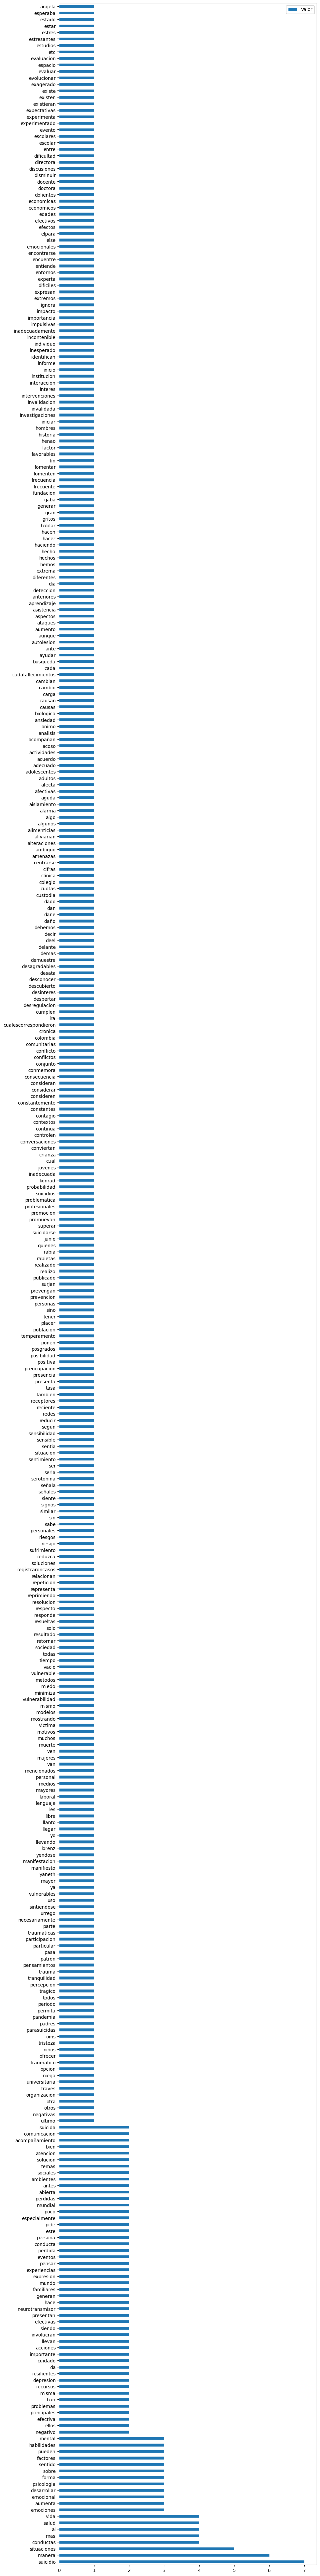

In [254]:
df_aja.plot(kind='barh', edgecolor="white", figsize=(10,100))

La noticia Real ya tiene como tal unas etiquetas, podemos compararlo con las etiquetas que nosotros extractamos a ver que tan lejos esta uno de lo otro

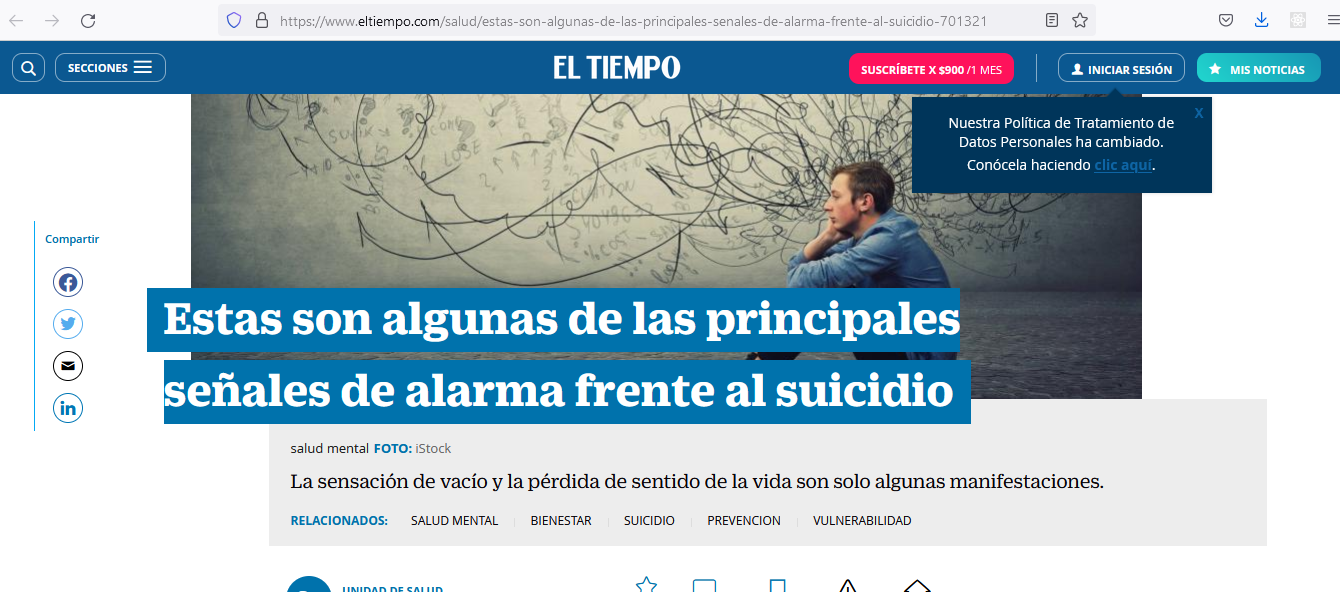

In [255]:
Image("noticia.png")

Las etiquetas de la noticia real fueron:
- Salud Mental
- Bienestar
- Suicidio
- Prevencion
- Vulnerabilidad

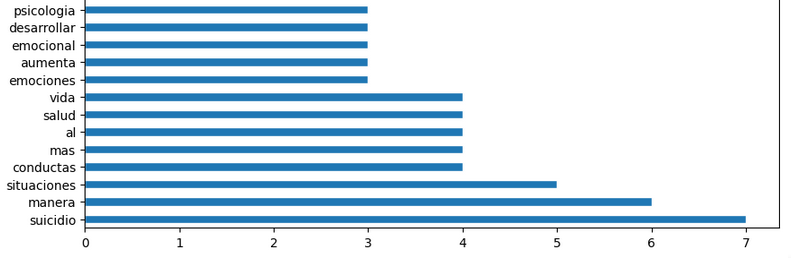

In [256]:
Image("grafica.png")

Con nuestro Sistema (quitando palabras que se colaron por sintaxis) tendriamos:
- suicidio
- situaciones
- conductas
- salud
- vida
- emociones
- desarrollar
- psicologia

##### Entonces...

El algoritmo utilizado con SK-learn nos permite distinguir las palabras de mayor ocurrencia y/o relevancia dentro de un tema, dándonos la idea en base a estos datos de que puede tratar o no un texto, en base a esto se pueden crear etiquetas para su clasificación. Sin embargo, este sistema es muy quisquilloso y es que, se deben implementar filtros que mientras más robustos sean mejores resultados se tendrán para un texto en concreto.
El problema de los filtros es que deben ser generales entre idiomas, pues uno muy robusto que funcione bien en un texto puede excluir palabras claves importantes en otro párrafo diferente.
En el caso de querer analizar textos de varios idiomas, el filtro principal debe ser la suma de tantos n idiomas se estén utilizando en el corpus del documento a analizar. Cada Fila final correspondería a un idioma y las mismas serian analizadas igual que en el caso anterior de la noticia de salud, sin embargo, al momento de ordenar los datos, se deberán separar los resultados en dataframes diferentes. Para su análisis recomiendo tratar cada idioma por separado desde el comienzo.
Si se quiere trabajar con distintos textos en un solo corpus recomiendo que sean en un unico idioma. Cada uno se clasificara en su fila unica.
